# Cross Validation
Rachael An 

# Implement the following steps:

1. Fit models and obtain predictions
2. Perform crossvalidation

# Import libraries and data

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# Import all additional libraries/functions here:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [2]:
# Load test training, test, and sample_submission CSV's as pandas data frames here
# Set the row indices to be the "ID" variable
training = pd.read_csv("data/train.csv", index_col = "Id")
test = pd.read_csv("data/test.csv", index_col = "Id")
submission = pd.read_csv("data/sample_submission.csv", index_col = "Id")

# Variables and model considered

To keep things simple, we'll
1. Once again consider the Kaggle house prices data
1. Only consider 5 numerical predictor variables aka features

Let's look at our data! 

In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   BedroomAbvGr  1460 non-null   int64
 3   HalfBath      1460 non-null   int64
 4   LotArea       1460 non-null   int64
 5   SalePrice     1460 non-null   int64
dtypes: int64(6)
memory usage: 79.8 KB


In [4]:
training.head()

,GrLivArea,YearBuilt,BedroomAbvGr,HalfBath,LotArea,SalePrice
Id,,,,,,
1,1710,2003,3,1,8450,208500
2,1262,1976,3,0,9600,181500
3,1786,2001,3,1,11250,223500
4,1717,1915,3,0,9550,140000
5,2198,2000,4,1,14260,250000


# Phase 1.a): MVP

- Fit a CART model to `SalePrice` using:
    - Using the five predictor values on all the training data
    - Set the complexity hyperparameter $\alpha$ to 0 i.e. the most complex tree
    - Do not change default values for all other parameters of the tree
    - There is a component to fitting CART this is actually random. Fix this by setting `random_state` to 76
- Make a submission to Kaggle
- Take screenshot of the score

In [3]:
# Create appropriate arrays
X_train = training[["GrLivArea", "YearBuilt", "BedroomAbvGr", "HalfBath", "LotArea"]].values
y_train = training[["SalePrice"]].values
X_test = test[["GrLivArea", "YearBuilt", "BedroomAbvGr", "HalfBath", "LotArea"]].values

# Instantiate model with appropriate hyperparameters
tree = DecisionTreeRegressor(random_state = 76, ccp_alpha = 0).fit(X_train, y_train)

# Fit model to training data
SalePrice_hat = tree.predict(X_test)

In [4]:
# Get predictions for test set
test['SalePrice_hat'] = SalePrice_hat

In [5]:
print(test)

      GrLivArea  YearBuilt  BedroomAbvGr  HalfBath  LotArea  SalePrice_hat
Id                                                                        
1461        896       1961             2         0    11622        97000.0
1462       1329       1958             3         1    14267       137500.0
1463       1629       1997             3         1    13830       181000.0
1464       1604       1998             3         1     9978       176500.0
1465       1280       1992             2         0     5005       180000.0
...         ...        ...           ...       ...      ...            ...
2915       1092       1970             3         1     1936        84500.0
2916       1092       1970             3         1     1894        81000.0
2917       1224       1960             4         0    20000       157900.0
2918        970       1992             3         0    10441       145000.0
2919       2000       1993             3         1     9627       237000.0

[1459 rows x 6 columns]


In [6]:
# Write to csv
submission = pd.DataFrame(test.index,
                          test['SalePrice_hat'])

submission.set_index(test.index, inplace = True)

submission['SalePrice'] = test['SalePrice_hat']

del submission['Id']

submission.to_csv('data/submission_CART.csv')

submission

,SalePrice
Id,
1461,97000.0
1462,137500.0
1463,181000.0
1464,176500.0
1465,180000.0
...,...
2915,84500.0
2916,81000.0
2917,157900.0


![screenshot of kaggle score](images/score_CART.png)

# Phase 1.b): MVP

- Use $k=10$ fold crossvalidation with a seed value of 76 to compute the local estimate of the RMSLE Kaggle score you computed in the previous section

In [7]:
kf = KFold(n_splits=10, shuffle=True, random_state=76)

cv_results = cross_val_score(tree, X_train, y_train, cv=kf, scoring = 'neg_mean_squared_log_error')

rmsle_scores = np.sqrt(-cv_results)

rmsle_estimate = np.mean(rmsle_scores)

print(rmsle_estimate)

0.24724101132095272


# Phase 2.a): Due Dilligence

- Fit a k nearest neighbor model to `SalePrice` using:
    - Using the five predictor values on all the training data
    - Set the hyperparameter $k$ to 6 i.e. for each point in the test data, your prediction is the mean of the 6 nearest neighboring points in predictor space. Note $k$ sets the complexity of the model, where like $\alpha$ in CART:
        - Higher values of $k$ correspond to simpler models
        - Lower values of $k$ correspond to more complex models
- Make a submission to Kaggle
- Take screenshot of the score

In [10]:
# Reuse X_train, y_train, X_test

# Instantiate model with appropriate hyperparameters
knn = KNeighborsRegressor(n_neighbors=6)

# Fit model to training data
knn.fit(X_train, y_train)

# Get predictions for test set
predictions = knn.predict(X_test)

#print(predictions)

test['SalePrice_hat_knn'] = predictions

print(test)

      GrLivArea  YearBuilt  BedroomAbvGr  HalfBath  LotArea  SalePrice_hat  \
Id                                                                           
1461        896       1961             2         0    11622        97000.0   
1462       1329       1958             3         1    14267       137500.0   
1463       1629       1997             3         1    13830       181000.0   
1464       1604       1998             3         1     9978       176500.0   
1465       1280       1992             2         0     5005       180000.0   
...         ...        ...           ...       ...      ...            ...   
2915       1092       1970             3         1     1936        84500.0   
2916       1092       1970             3         1     1894        81000.0   
2917       1224       1960             4         0    20000       157900.0   
2918        970       1992             3         0    10441       145000.0   
2919       2000       1993             3         1     9627     

In [11]:
# Write to csv
submission_knn = pd.DataFrame(test.index,
                          test['SalePrice_hat_knn'])

submission_knn.set_index(test.index, inplace = True)

submission_knn['SalePrice'] = test['SalePrice_hat_knn']

del submission_knn['Id']

submission_knn.to_csv('data/submission_knn.csv')

submission_knn

,SalePrice
Id,
1461,121533.333333
1462,178800.000000
1463,205650.333333
1464,205150.000000
1465,164783.333333
...,...
2915,94416.666667
2916,91416.666667
2917,208245.000000


![screenshot of kaggle score](images/scoreknn.png)

# Phase 2.b): Due Dilligence

- Using the same $k=10$ fold crossvalidation object you created earlier, compute the local estimate of the RMSLE Kaggle score you computed in the previous section. We are using the same crossvalidation object to hold the variation induced by fold creation constant. 

In [12]:
# Do not recreate kf, use same one
cv_results_knn = cross_val_score(knn, X_train, y_train, cv=kf, scoring = 'neg_mean_squared_log_error')

rmsle_scores_knn = np.sqrt(-cv_results_knn)

rmsle_estimate_knn = np.mean(rmsle_scores_knn)

print(rmsle_estimate_knn)

0.2719269475562517


# Phase 3.a)
- Fit a multiple linear regression model `SalePrice` using:
    - Using the five predictor values on all the training data
    - For multiple linear regression there is no complexity hyperparameter that sets balance between complex and simple models. We'll see that LASSO and Ridge Regression is a variant to multiple regression that does allow us to set that balance
- Make a submission to Kaggle
- Take screenshot of the score

In [14]:
# No need to redefine X_train, y_train, X_test. We can reuse them

# Instantiate model with appropriate hyperparameters
reg = LinearRegression()
reg.fit(X_train, y_train)

# Fit model to training data
predictions_reg = reg.predict(X_test)

# Get predictions for test set
test['SalePrice_hat_reg'] = predictions_reg

print(test)

      GrLivArea  YearBuilt  BedroomAbvGr  HalfBath  LotArea  SalePrice_hat  \
Id                                                                           
1461        896       1961             2         0    11622          81000   
1462       1329       1958             3         1    14267         112000   
1463       1629       1997             3         1    13830         196500   
1464       1604       1998             3         1     9978         181000   
1465       1280       1992             2         0     5005         189000   
...         ...        ...           ...       ...      ...            ...   
2915       1092       1970             3         1     1936          75000   
2916       1092       1970             3         1     1894          75000   
2917       1224       1960             4         0    20000         135000   
2918        970       1992             3         0    10441          93500   
2919       2000       1993             3         1     9627     

In [15]:
# Write to csv
submission_reg = pd.DataFrame(test.index,
                              test['SalePrice_hat_reg'])

submission_reg.set_index(test.index, inplace = True)

submission_reg['SalePrice'] = test['SalePrice_hat_reg']

del submission_reg['Id']

submission_reg.to_csv('data/submission_reg.csv')

submission_reg

,SalePrice
Id,
1461,122375.398776
1462,139953.559662
1463,212024.581621
1464,207554.793803
1465,191466.047335
...,...
2915,116994.312205
2916,116964.976553
2917,128243.275487


![screenshot of kaggle score](images/score_regression.png)

# Phase 3.b)

- Using the same $k=10$ fold crossvalidation object you created earlier, compute the local estimate of the RMSLE Kaggle score you computed in the previous section. We are using the same crossvalidation object to hold the variation induced by fold creation constant. 

In [16]:
# Use the same recreate kf
cv_results_reg = cross_val_score(reg, X_train, y_train, cv=kf, scoring = 'neg_mean_squared_log_error')

rmsle_scores_reg = np.sqrt(-cv_results_reg)

rmsle_estimate_reg = np.mean(rmsle_scores_reg)

print(rmsle_estimate_reg)

0.21768383818382758


# Phase 4: Point of Diminished Returns

Fill in this table with all values of the RMSLE's you computed in this problem set with 5 digits decimal precision

| RMSLE               | CART with alpha=0 | kNN with k = 6 | Multiple Regression |
|---------------------|-------------------|----------------|---------------------|
| Score on Kaggle     | 0.26612           | 0.29258        | 0.22276             |
| k=10 CV estimate    | 0.24724           | 0.27193        | 0.21768             |
| Absolute Difference | 0.01888           | 0.02065        | 0.00508             |


# Phase 5: Reach for the Stars

- Using the same $k=10$ fold crossvalidation object you created earlier, produce a side-by-side boxplot visualizing
    - On the x-axis: For each of the three models used
    - On the y-axis: The 10 estimates of RMSLE corresponding to each of the $k$ = 10 folds. i.e. don't average them
- Use a dictionary of our three called `models` and then use a for loop to loop through each model 

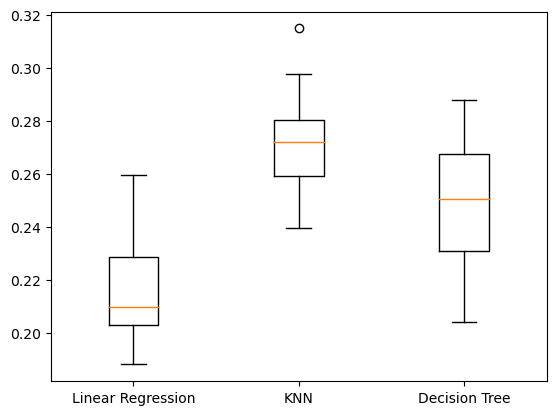

In [13]:
models = {"Linear Regression": LinearRegression(), "KNN": KNeighborsRegressor(n_neighbors=6),
          "Decision Tree": DecisionTreeRegressor(random_state = 76, ccp_alpha = 0)}

results = []

for model in models.values():
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring = 'neg_mean_squared_log_error')
    rmsle_scores = np.sqrt(-cv_results)
    results.append(rmsle_scores)

plt.boxplot(results, labels=models.keys())
plt.show()